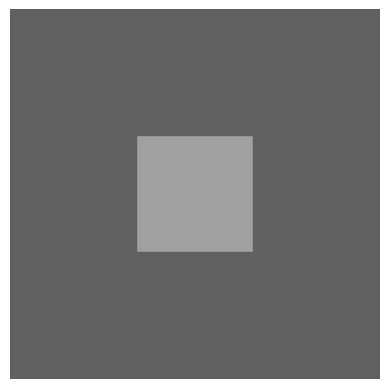

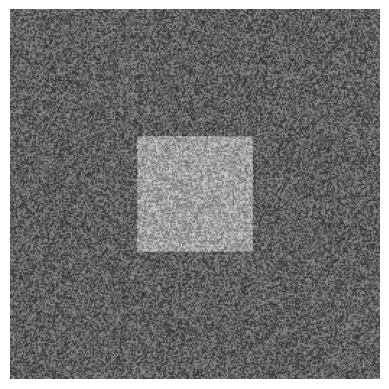

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数
image_size = 256
square_size = 80
square_gray_value = 160
background_gray_value = 96
noise_amplitude = 48

# 创建一个256x256的灰度图像，初始灰度值为96
background = np.full((image_size, image_size), background_gray_value, dtype=np.uint8)

# 计算正方形的左上角和右下角坐标
start = (image_size - square_size) // 2
end = start + square_size

# 绘制正方形，灰度值为160
background[start:end, start:end] = square_gray_value

# 显示没有噪声的图像
plt.imshow(background, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

# 创建带噪声的图像
noise = np.random.randint(-noise_amplitude, noise_amplitude, (image_size, image_size), dtype=np.int16)
image = background.astype(np.int16) + noise
image = np.clip(image, 0, 255).astype(np.uint8)

# 显示带噪声的图像
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()


In [2]:
# Save the generated image
image_path = 'simulated_image.png'
plt.imsave(image_path, image, cmap='gray', format='png')

image_path


'simulated_image.png'

In [3]:
import cv2
import numpy as np

# 读取图像
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

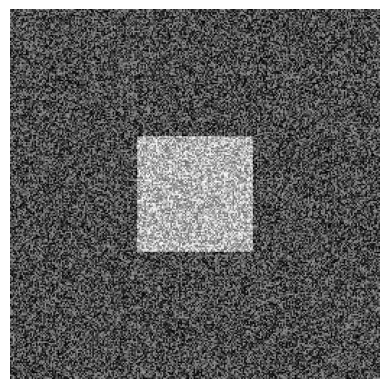

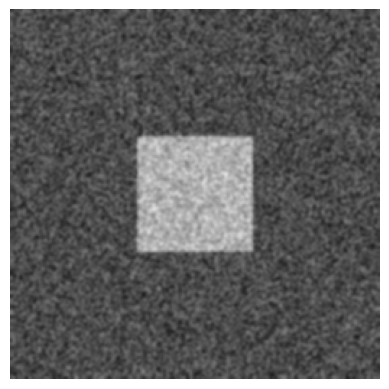

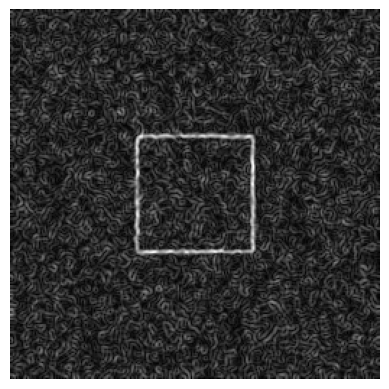

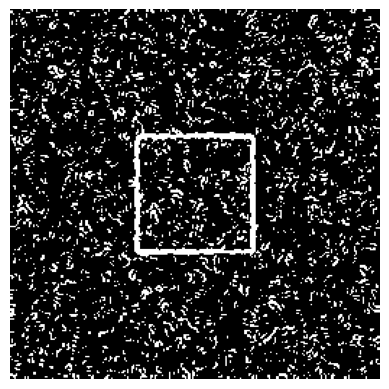

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 高斯滤波平滑图像
smoothed_image = cv2.GaussianBlur(original_image, (5, 5), 0)

# Sobel边缘检测
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_direction = np.arctan2(sobel_y, sobel_x)

# 阈值处理
threshold = 100
edges = np.zeros_like(gradient_magnitude)
edges[gradient_magnitude > threshold] = 255

# 显示原始图像
image_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.axis('off')
plt.show()

# 显示经过高斯滤波的图像
image_smoothed = cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB)
plt.imshow(image_smoothed)
plt.axis('off')
plt.show()

# 显示Sobel算子处理后的非二值化图像
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')
plt.show()

# 显示Sobel边缘检测结果
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


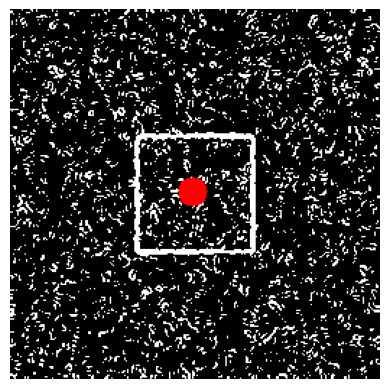

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 确保edges是单通道8位图像
if edges.ndim > 2 and edges.shape[2] == 3:
    # 如果edges是彩色图像，则转换为灰度图像
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)

if edges.dtype != np.uint8:
    # 将edges转换为8位单通道图像
    edges = np.uint8(edges)


# 使用霍夫变换检测直线
lines = cv2.HoughLines(edges, 1, np.pi/180, 50)  # 阈值

if lines is not None:
    # 存储所有直线的参数
    lines_params = [(rho, theta) for line in lines for rho, theta in line]
    
    # 计算交点的函数（示例实现，可能需要根据需要调整）
    def compute_intersections(lines_params):
        intersections = []
        for i in range(len(lines_params)):
            for j in range(i+1, len(lines_params)):
                rho1, theta1 = lines_params[i]
                rho2, theta2 = lines_params[j]
                A = np.array([
                    [np.cos(theta1), np.sin(theta1)],
                    [np.cos(theta2), np.sin(theta2)]
                ])
                B = np.array([rho1, rho2])
                try:
                    intersection = np.linalg.solve(A, B)
                    intersections.append(intersection)
                except np.linalg.LinAlgError:
                    # 如果两条直线平行，则跳过
                    continue
        return intersections

    # 计算交点
    intersections = compute_intersections(lines_params)

    # 选择中心点（这里简单地取所有交点的平均值）
    if intersections:
        center_point = np.mean(intersections, axis=0)
        center_point = tuple(np.round(center_point).astype(int))
        
        # 在图像上高亮显示中心点
        marked_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
        cv2.circle(marked_image, center_point, 10, (0, 0, 255), -1)

        # 显示结果
        plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("未找到交点")
else:
    print("没有检测到直线")


In [6]:
center_point

(126, 126)

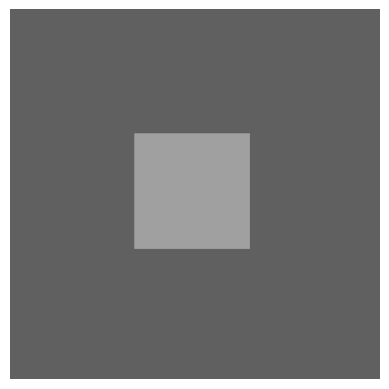

In [9]:
# 创建一个256x256的灰度图像，初始灰度值为96
bd = np.full((256, 256), 96, dtype=np.uint8)

# 定义正方形的中心点和长宽

square_size = 80
half_size = square_size // 2

# 计算正方形的左上角和右下角坐标
top_left = (center_point[0] - half_size, center_point[1] - half_size)
bottom_right = (center_point[0] + half_size, center_point[1] + half_size)

# 在图像上绘制正方形，灰度值为160
bd[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = 160

# 显示图像
plt.imshow(bd, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


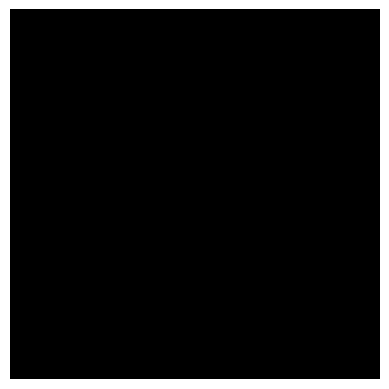

In [14]:
#使用NumPy
difference = np.abs(background.astype(int) - bd.astype(int)).astype(np.uint8)

# 显示差值图像
# 使用matplotlib显示差值图像
plt.imshow(difference, cmap='gray')
plt.axis('off')  # 关闭坐标轴
plt.show()